# DOCUMENTATION BOOTSTRAP

### Création de la classe et alimentation de celle-ci.

x_train : array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train:  array of digit labels (integers in range 0-9) with shape (60000,) for the training data.


x_test: array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [2]:
from tensorflow.keras.datasets import mnist 

class MNISTData: 
    def __init__(self): 
        # Variables
        MAX_ELEM_TRAIN = 60000
        MAX_ELEM_TEST = 10000

        # Chargement des dataset
        (x_train, y_train), (x_test, y_test) = mnist.load_data() 
 
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train 
        self.y_test = y_test 

mnist_data = MNISTData() 

assert mnist_data.x_train.shape == (60000, 28, 28)
assert mnist_data.x_test.shape == (10000, 28, 28)
assert mnist_data.y_train.shape == (60000,)
assert mnist_data.y_test.shape == (10000,)


### Création d'une méthode permettant l'affichage de statistiques simple simple.

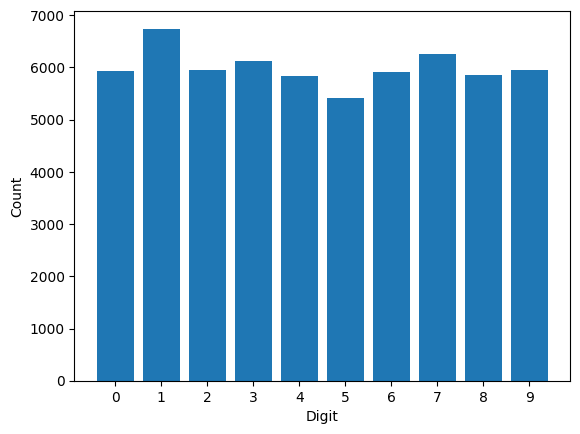

In [3]:
import matplotlib.pyplot as plt
import numpy as np 

#La méthode display_statistics() affiche un histogramme de la distribution de chaque chiffre 
# dans l'ensemble d'entraînement. 
# Pratiquepour vérifier si les données sont équilibrées. 
def display_statistics(self): 
        plt.figure('Statistics')
        # Affichage des distributions de chaques digit du training set
        digit_counts = np.bincount(self.y_train) 
        digits = np.arange(len(digit_counts))
        plt.bar(digits, digit_counts) 
        plt.xticks(digits) 
        plt.xlabel('Digit') 
        plt.ylabel('Count') 
        plt.show()

mnist_data = MNISTData() 
display_statistics(mnist_data)

### Création de la méthode qui affiche une image d'un dataset choisi.

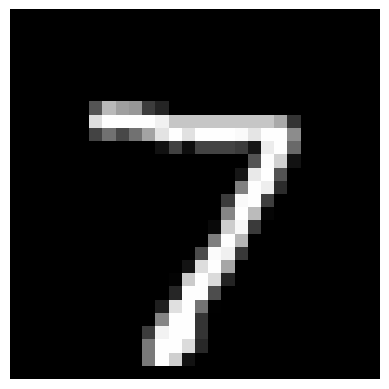

In [4]:
# La méthode display_image() affiche une image spécifique de l'ensemble d'entraînement ou de test, en spécifiant l'indice de l'image et le nom de l'ensemble de données. 
def display_image(self, index, dataset):
        # Display the image at the specified index in the specified dataset 
        plt.figure('image ' + str(index))
        if dataset == 'train':
            image = self.x_train[index].reshape((28, 28)) 
        elif dataset == 'test': 
            image = self.x_test[index].reshape((28, 28)) 
        else: 
            raise ValueError('Invalid dataset name: {}'.format(dataset)) 
        plt.imshow(image, cmap='gray') 
        plt.axis('off')
        plt.show() 

mnist_data = MNISTData() 
display_image(mnist_data, 0, 'test')

### Trouver une façon d'afficher les spécificités de chaque chiffre.

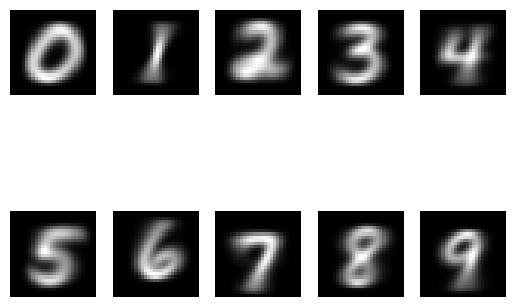

In [5]:
#La méthode display_digit_means() calcule et affiche l'image moyenne de chaque chiffre dans l'ensemble d'entraînement. 
#Cette méthode est utile pour visualiser les caractéristiques distinctives de chaque chiffre. 
def display_digit_means(self): 
        # Calcule et affiche les charactéristiques de chaque chiffre
        plt.figure('digits means')
        digit_means = [] 
        for digit in range(10): 
            digit_indices = np.where(self.y_train == digit)[0] 
            digit_images = self.x_train[digit_indices] 
            digit_mean = np.mean(digit_images, axis=0).reshape((28, 28)) 
            digit_means.append(digit_mean) 
 
        PLT_LIGNES = 2
        PLT_COLONES = 5
        PLT_INDEX = 0
        for i in range(10): 
            PLT_INDEX += 1
            plt.subplot(PLT_LIGNES, PLT_COLONES, PLT_INDEX) 
            plt.imshow(digit_means[i], cmap='gray') 
            plt.axis('off') 
        plt.show() 

mnist_data = MNISTData() 
display_digit_means(mnist_data)

### Remodeler et changer la taille des dataset via une méthode pour que [n,28x28]=[n,784].

In [6]:
# Remodelage et uniformisation des datas
def reshaping(self):
        # Remodelage des datas
        self.x_train = self.x_train.reshape((60000, 784))
        self.x_test = self.x_test.reshape((10000, 784))

        # Uniformisation des pixels
        self.x_train = self.x_train /255
        self.x_train = self.x_test /255


mnist_data = MNISTData() 

print(mnist_data.x_test.shape)
reshaping(mnist_data)
print(mnist_data.x_test.shape)

(10000, 28, 28)
(10000, 784)


### Source :
* [test des dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)
* [remodelage et uniformisation d'image](https://medium.com/@jwbtmf/reshaping-the-dataset-for-neural-network-15ee7bcea25e)